# Multiple Linear Regression


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }
df = pd.DataFrame(data)
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


## Check for Linearity
* There Must exist a linear relatioship between the dependent and the independet variable.

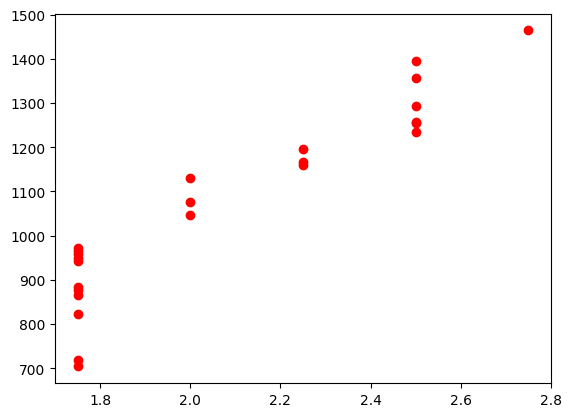

In [7]:
# plot a scatter plot to check for a linear relatioship
plt.scatter(x = "interest_rate", y = "index_price", data = df, color = "red")



* Its important to note that this data does not necessarily represent a linear relationship

In [8]:
# checking the correlation
df["interest_rate"].corr(df["index_price"])

0.9357932222393663

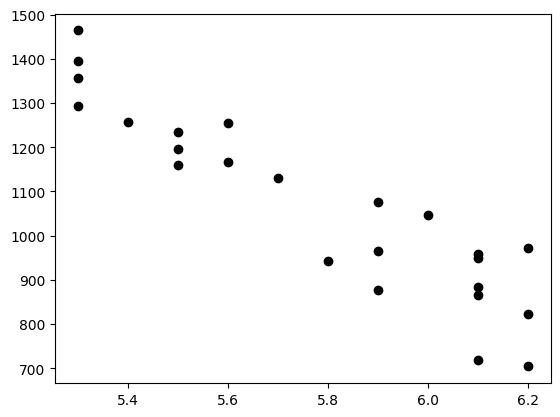

In [9]:
plt.scatter(x = "unemployment_rate", y = "index_price", data = df, color = "black")

In [10]:
# checking the correlation
df["unemployment_rate"].corr(df["index_price"], method="spearman")

-0.8993158772215627

In [11]:
from sklearn.linear_model import LinearRegression


In [14]:
# assignment 
# what is cross validation and how can we use that to improve our splitting:
# Cheat Code: Antonny's Slack


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[["interest_rate", "unemployment_rate"]].values
y = df["index_price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
regressor = LinearRegression()
# fit the model
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
# 
regressor.coef_

array([ 260.26126267, -360.55339049])

In [16]:
# 
regressor.intercept_

2601.599844115359

In [17]:
y_pred = regressor.predict(X_test)

In [36]:
# compraring our actual vs our predicted results 
comp_df = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_pred.flatten()})
comp_df

,Actual,Predicted
0,1159,1204.144037
1,971,821.626033
2,1464,1406.385347
3,884,857.681372
4,1075,994.857366


## Evaluate the performance
* Mean absolute error 
* Mean Square Error
* Root mean Squared Error
* Task 

       >> Area Under the curve

       >> Any other measure of evaluation

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
print(f"Mean absolute error: {np.round(mean_absolute_error(y_test, y_pred), 4)}")
print(f"Mean squared error: {np.round(mean_squared_error(y_test, y_pred), 4)}")
print(f"Root mean squared error: {np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)}")

Mean absolute error: 71.7188
Mean squared error: 6957.1053
Root mean squared error: 83.4093


In [19]:
import statsmodels.api as sm

In [20]:
x = sm.add_constant(X)

In [21]:
model = sm.OLS(y, x).fit()

In [22]:
predictions = model.predict(x)

In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.04e-11
Time:                        10:47:27   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1798.4040    899.248      2.000      0.0